<a href="https://colab.research.google.com/github/YahyaHabib/-Water---contaminants-and-levels/blob/main/Statistical_modeling_continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


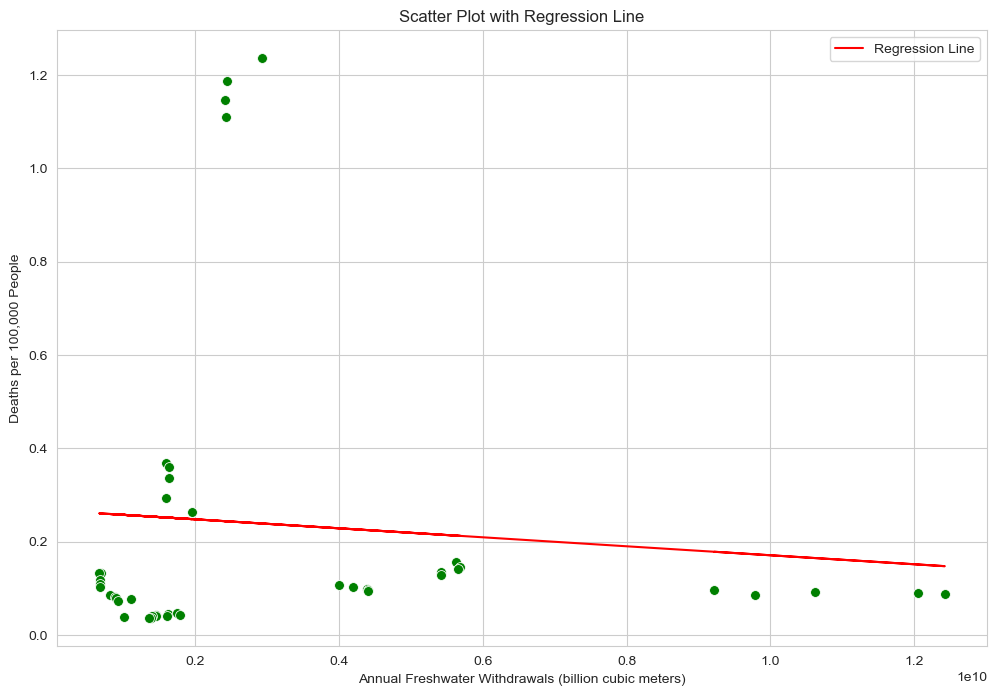

In [ ]:
# Import necessary libraries for data manipulation, visualization, statistical analysis, and machine learning
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import linregress

# Load the dataset from a CSV file
data = pd.read_csv("/Applications/integrated_water_related_data.csv")

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the matplotlib figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot of freshwater withdrawals vs. deaths attributed to unsafe water, with customized color and marker size
ax = sns.scatterplot(x=data['Annual freshwater withdrawals, total (billion cubic meters)'],
                     y=data['Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized'],
                     color='green', s=50)

# Perform a linear regression on the data to find the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(data['Annual freshwater withdrawals, total (billion cubic meters)'],
                                                         data['Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized'])

# Calculate the values of the regression line to plot
line = slope * data['Annual freshwater withdrawals, total (billion cubic meters)'] + intercept

# Plot the regression line on top of the scatter plot
ax.plot(data['Annual freshwater withdrawals, total (billion cubic meters)'], line, color='red', label='Regression Line')

# Set the x and y axes labels
plt.xlabel('Annual Freshwater Withdrawals (billion cubic meters)')
plt.ylabel('Deaths per 100,000 People')

# Set the title of the plot
plt.title('Scatter Plot with Regression Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()


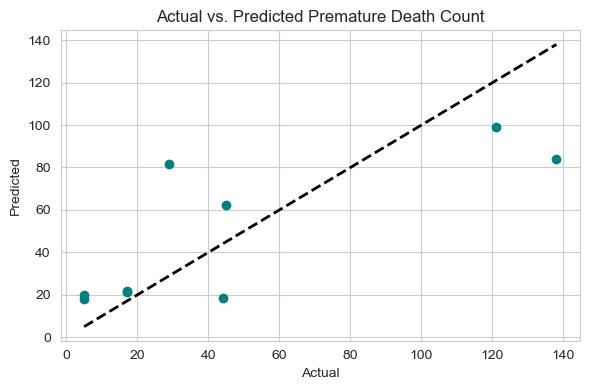

In [ ]:
# Drop non-numeric or target columns from the data to use as features (X) and isolate the target variable (y)
X = data.drop(['Entity', 'Year', 'Premature_Death_Count', 'Health_Impact'], axis=1)
y = data['Premature_Death_Count']

# Split the dataset into training and testing sets, with 20% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to predict the target variable in the test set
y_pred = model.predict(X_test)

# Initialize a figure for plotting
plt.figure(figsize=(6, 4))

# Plot the actual vs predicted values of the target variable
plt.scatter(y_test, y_pred, color='teal')

# Plot a line representing the "perfect" predictions for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Set the labels for the x and y axes
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Set the title of the plot
plt.title('Actual vs. Predicted Premature Death Count')

# Adjust layout for better readability
plt.tight_layout()

# Display the plot
plt.show()




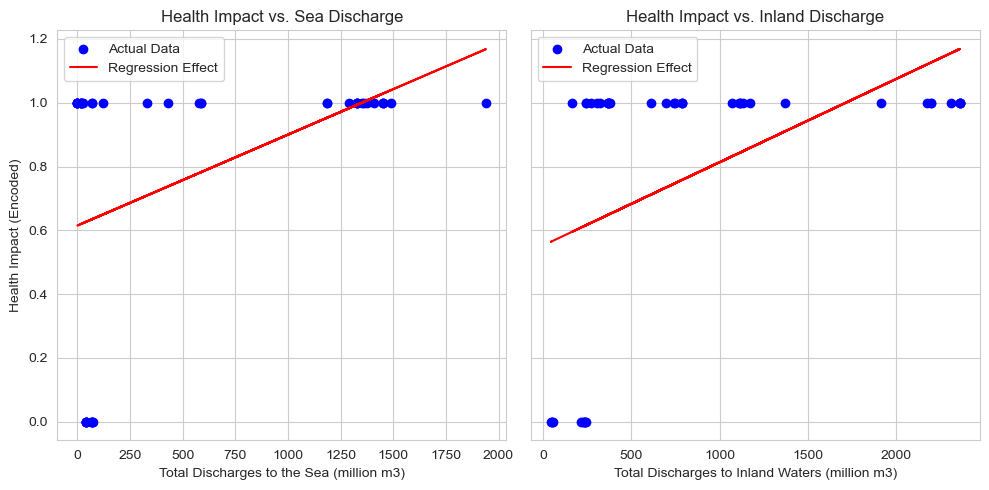

In [ ]:
# Perform linear regression between total discharges to the sea and health impact, capturing slope and intercept for plotting
slope_sea_health, intercept_sea_health, _, _, _ = linregress(data['Total discharges to the sea(million m3)'],
                                                             encoded_health_impact)
# Calculate the regression line for plotting against discharges to the sea
line_sea_health = slope_sea_health * data['Total discharges to the sea(million m3)'] + intercept_sea_health

# Perform linear regression between total discharges to inland waters and health impact, capturing slope and intercept for plotting
slope_inland_health, intercept_inland_health, _, _, _ = linregress(data['Total discharges to Inland waters(million m3)'],
                                                                   encoded_health_impact)
# Calculate the regression line for plotting against discharges to inland waters
line_inland_health = slope_inland_health * data['Total discharges to Inland waters(million m3)'] + intercept_inland_health

# Initialize a figure with 2 subplots, sharing the y-axis for easier comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot actual data and the regression effect for discharges to the sea
axs[0].scatter(data['Total discharges to the sea(million m3)'], encoded_health_impact, color='blue', label='Actual Data')
axs[0].plot(data['Total discharges to the sea(million m3)'], line_sea_health, color='red', label='Regression Effect')
axs[0].set_title('Health Impact vs. Sea Discharge')
axs[0].set_xlabel('Total Discharges to the Sea (million m3)')
axs[0].set_ylabel('Health Impact (Encoded)')

# Plot actual data and the regression effect for discharges to inland waters
axs[1].scatter(data['Total discharges to Inland waters(million m3)'], encoded_health_impact, color='blue', label='Actual Data')
axs[1].plot(data['Total discharges to Inland waters(million m3)'], line_inland_health, color='red', label='Regression Effect')
axs[1].set_title('Health Impact vs. Inland Discharge')
axs[1].set_xlabel('Total Discharges to Inland Waters (million m3)')

# Add legends to both subplots for clarity
axs[0].legend()
axs[1].legend()

# Adjust layout for neatness
plt.tight_layout()
plt.show()


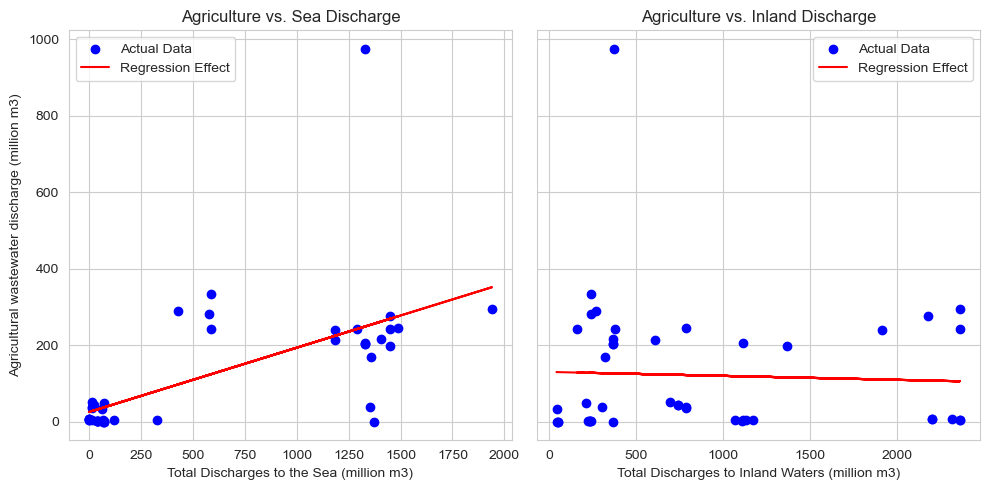

In [ ]:
# Linear regression between total discharges to the sea and agricultural wastewater discharges
slope_sea, intercept_sea, _, _, _ = linregress(data['Total discharges to the sea(million m3)'],
                                               data['Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)'])
# Calculate regression line for sea discharges
line_sea = slope_sea * data['Total discharges to the sea(million m3)'] + intercept_sea

# Linear regression between total discharges to inland waters and agricultural wastewater discharges
slope_inland, intercept_inland, _, _, _ = linregress(data['Total discharges to Inland waters(million m3)'],
                                                     data['Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)'])
# Calculate regression line for inland water discharges
line_inland = slope_inland * data['Total discharges to Inland waters(million m3)'] + intercept_inland

# Initialize a figure with two subplots, sharing the y-axis for consistent scale comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot actual data and regression line for sea discharges
axs[0].scatter(data['Total discharges to the sea(million m3)'],
               data['Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)'],
               color='blue', label='Actual Data')
axs[0].plot(data['Total discharges to the sea(million m3)'], line_sea, color='red', label='Regression Effect')
axs[0].set_title('Agriculture vs. Sea Discharge')
axs[0].set_xlabel('Total Discharges to the Sea (million m3)')
axs[0].set_ylabel('Agricultural wastewater discharge (million m3)')

# Plot actual data and regression line for inland water discharges
axs[1].scatter(data['Total discharges to Inland waters(million m3)'],
               data['Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)'],
               color='blue', label='Actual Data')
axs[1].plot(data['Total discharges to Inland waters(million m3)'], line_inland, color='red', label='Regression Effect')
axs[1].set_title('Agriculture vs. Inland Discharge')
axs[1].set_xlabel('Total Discharges to Inland Waters (million m3)')

# Add legends to both plots for clarity
axs[0].legend()
axs[1].legend()

# Adjust the layout for better readability
plt.tight_layout()

# Display the plots
plt.show()


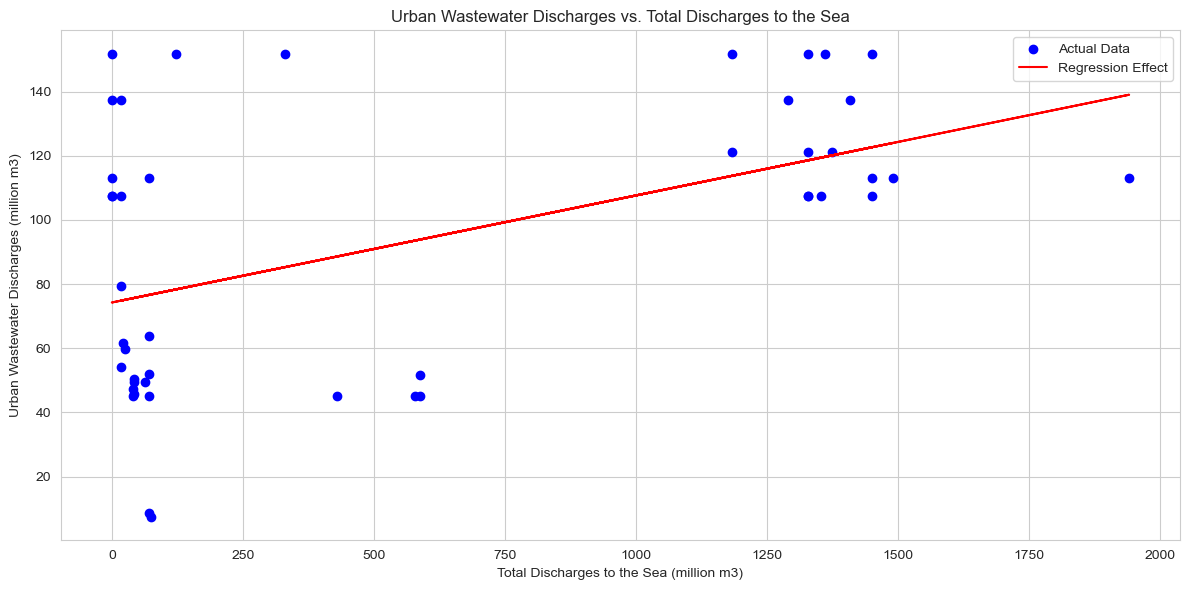

In [ ]:
# Perform linear regression to find the relationship between total discharges to the sea and untreated urban wastewater discharges
slope_urban_sea, intercept_urban_sea, _, _, _ = linregress(data['Total discharges to the sea(million m3)'],
                                                           data['Urban wastewater, all sources, discharged without treatment(million m3)'])
# Calculate the regression line values for plotting
line_urban_sea = slope_urban_sea * data['Total discharges to the sea(million m3)'] + intercept_urban_sea

# Initialize a figure with specified dimensions
plt.figure(figsize=(12, 6))

# Scatter plot showing actual data points for total sea discharges and urban wastewater discharges
plt.scatter(data['Total discharges to the sea(million m3)'],
            data['Urban wastewater, all sources, discharged without treatment(million m3)'],
            color='blue', label='Actual Data')

# Plot the regression line to visualize the relationship
plt.plot(data['Total discharges to the sea(million m3)'], line_urban_sea, color='red', label='Regression Effect')

# Label the x-axis as total discharges to the sea
plt.xlabel('Total Discharges to the Sea (million m3)')
# Label the y-axis as urban wastewater discharges without treatment
plt.ylabel('Urban Wastewater Discharges (million m3)')
# Set the title to describe the plot
plt.title('Urban Wastewater Discharges vs. Total Discharges to the Sea')

# Display a legend to differentiate between actual data and the regression line
plt.legend()

# Adjust the layout for a neat presentation
plt.tight_layout()

# Display the plot
plt.show()


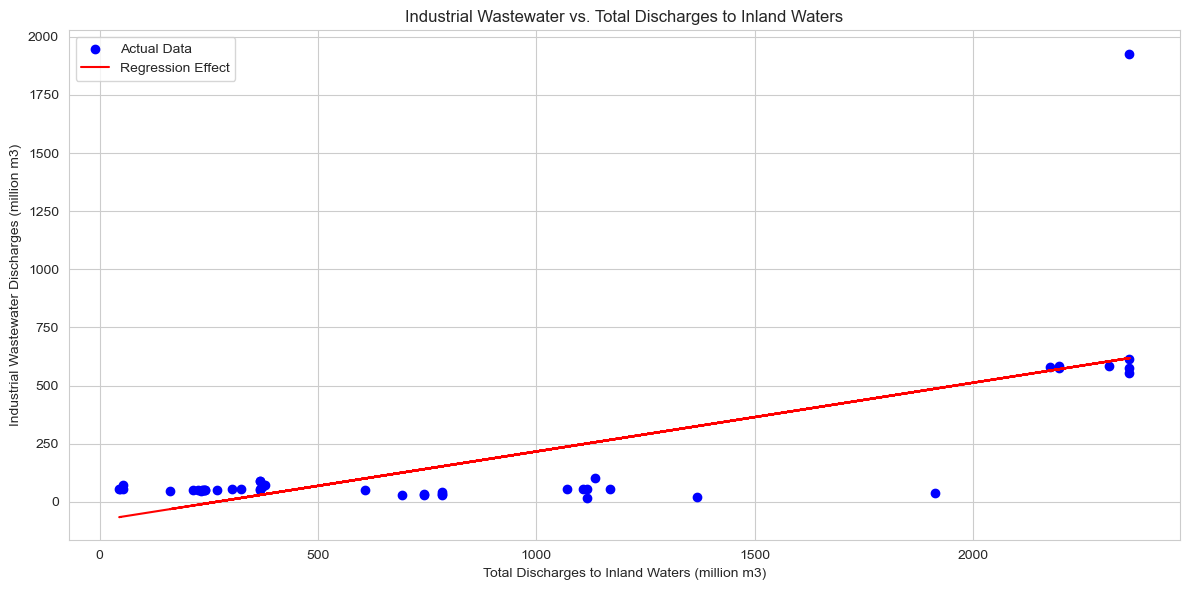

In [ ]:
# Perform linear regression between total discharges to inland waters and untreated industrial wastewater discharges
slope_industrial_inland, intercept_industrial_inland, _, _, _ = linregress(data['Total discharges to Inland waters(million m3)'],
                                                                           data['Industrial wastewater, all sources, discharged without treatment(million m3)'])

# Calculate the values for the regression line for visualization
line_industrial_inland = slope_industrial_inland * data['Total discharges to Inland waters(million m3)'] + intercept_industrial_inland

# Initialize a plotting figure with specified dimensions
plt.figure(figsize=(12, 6))

# Create a scatter plot to show actual data points for total inland water discharges against industrial wastewater discharges
plt.scatter(data['Total discharges to Inland waters(million m3)'],
            data['Industrial wastewater, all sources, discharged without treatment(million m3)'],
            color='blue', label='Actual Data')

# Plot the regression line to illustrate the estimated relationship
plt.plot(data['Total discharges to Inland waters(million m3)'], line_industrial_inland, color='red', label='Regression Effect')

# Label the x-axis as total discharges to inland waters
plt.xlabel('Total Discharges to Inland Waters (million m3)')
# Label the y-axis as industrial wastewater discharges without treatment
plt.ylabel('Industrial Wastewater Discharges (million m3)')
# Set a title to describe the plot's focus
plt.title('Industrial Wastewater vs. Total Discharges to Inland Waters')

# Add a legend to help differentiate between the actual data points and the regression line
plt.legend()

# Adjust the plot layout for clarity and better presentation
plt.tight_layout()

# Display the plot to the user
plt.show()


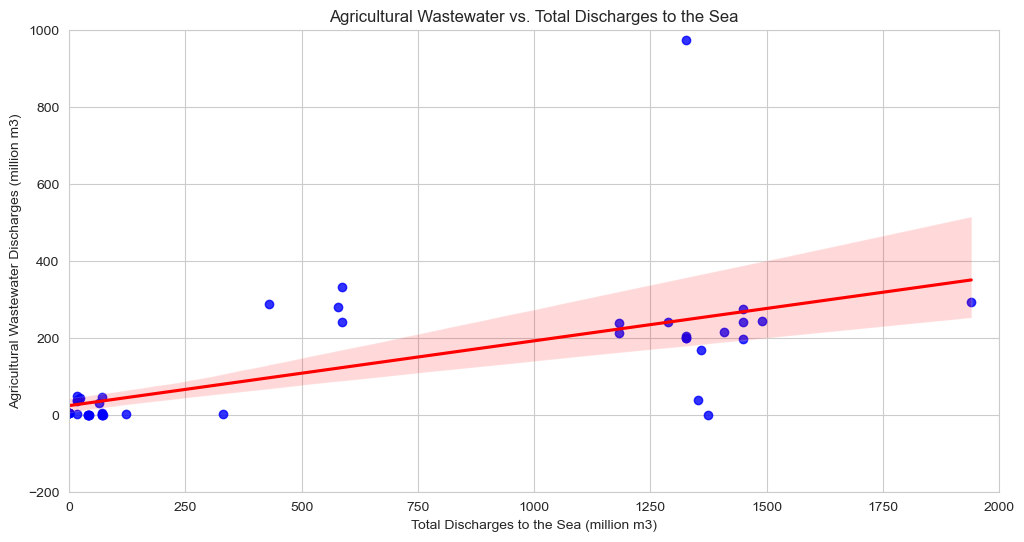

In [ ]:
# Initialize the plotting figure with specified dimensions
plt.figure(figsize=(12, 6))

# Create a regression plot using seaborn. This automatically calculates and plots a regression line
# along with a scatter plot of the data points. The confidence interval for the regression estimate is set to 95%.
ax = sns.regplot(x='Total discharges to the sea(million m3)',
                 y='Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)',
                 data=data, color='blue', line_kws={'color':'red'}, ci=95, scatter_kws={'color': 'blue'})

# Set the limits for the x-axis to focus the plot on a specific range of data values
ax.set_xlim(left=0, right=2000)

# Set the limits for the y-axis to focus the plot on a specific range of data values
ax.set_ylim(bottom=-200, top=1000)

# Label the x-axis to identify the variable being plotted
ax.set_xlabel('Total Discharges to the Sea (million m3)')

# Label the y-axis to identify the variable being plotted
ax.set_ylabel('Agricultural Wastewater Discharges (million m3)')

# Set the title of the plot to describe its content
ax.set_title('Agricultural Wastewater vs. Total Discharges to the Sea')

# Set the plot's background style for better readability and aesthetic
sns.set_style("whitegrid")

# Display the plot
plt.show()


/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/rb/ncx9xsdn19n43_wnxgl1m92h0000gn/T/ipykernel_7718/1586194812.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes de

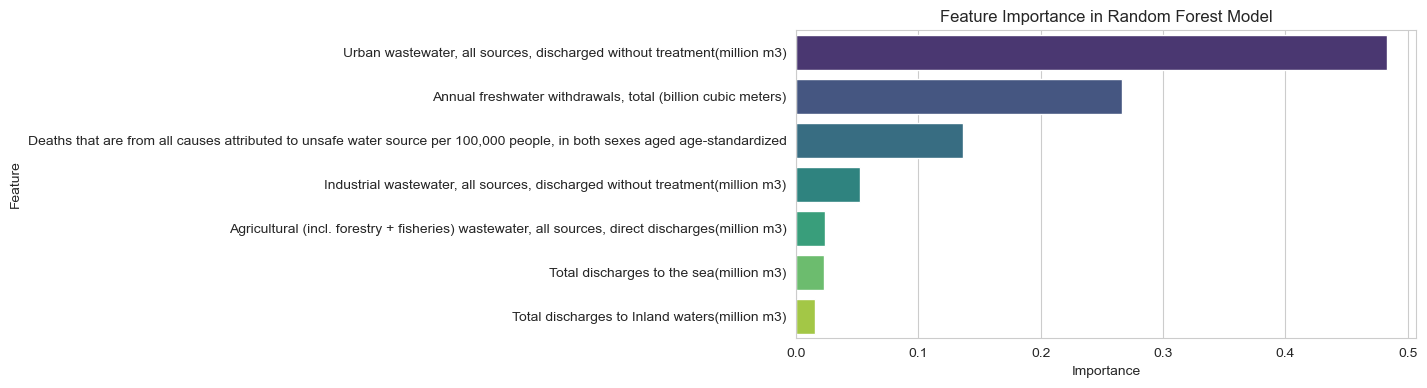

In [ ]:
# Prepare the feature matrix (X) by dropping irrelevant columns and set the target variable (y)
X = data.drop(['Entity', 'Year', 'Premature_Death_Count', 'Health_Impact'], axis=1)
y = data['Premature_Death_Count']

# Initialize the Random Forest Regressor with 100 trees and a fixed random state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the entire dataset
rf_model.fit(X, y)

# Extract feature importances calculated by the model
importances = rf_model.feature_importances_
# Extract feature names
feature_names = X.columns
# Create a pandas series to map importances to feature names, and sort them in descending order
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Initialize a figure for plotting
plt.figure(figsize=(8, 4))
# Create a bar plot showing the importance of each feature. The 'viridis' palette is used for coloring.
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')

# Label the x-axis as 'Importance'
plt.xlabel('Importance')
# Label the y-axis as 'Feature'
plt.ylabel('Feature')
# Set the title of the plot to indicate what it represents
plt.title('Feature Importance in Random Forest Model')

# Adjust layout for better presentation
plt.tight_layout()

# Display the plot
plt.show()


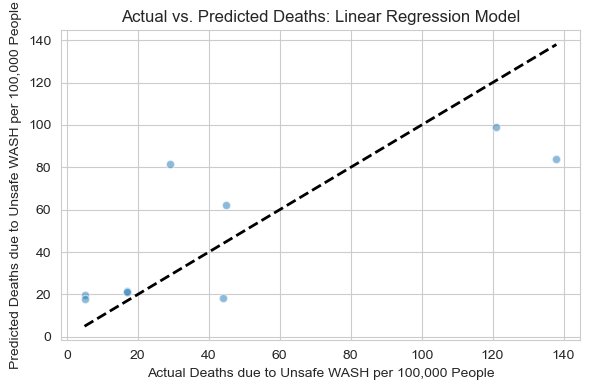

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg_model = LinearRegression()

# Train the Linear Regression model on the training data
lin_reg_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = lin_reg_model.predict(X_test)

# Initialize a figure for plotting with specified dimensions
plt.figure(figsize=(6, 4))
# Create a scatter plot to visualize the actual vs. predicted values, with some transparency (alpha) for better visibility of overlapping points
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w')
# Plot a dashed line to represent the perfect predictions for comparison
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# Label the x-axis with a description of the actual values
plt.xlabel('Actual Deaths due to Unsafe WASH per 100,000 People')
# Label the y-axis with a description of the predicted values
plt.ylabel('Predicted Deaths due to Unsafe WASH per 100,000 People')
# Set the title of the plot to describe its content
plt.title('Actual vs. Predicted Deaths: Linear Regression Model')
# Adjust the layout for better presentation
plt.tight_layout()
# Display the plot
plt.show()


/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


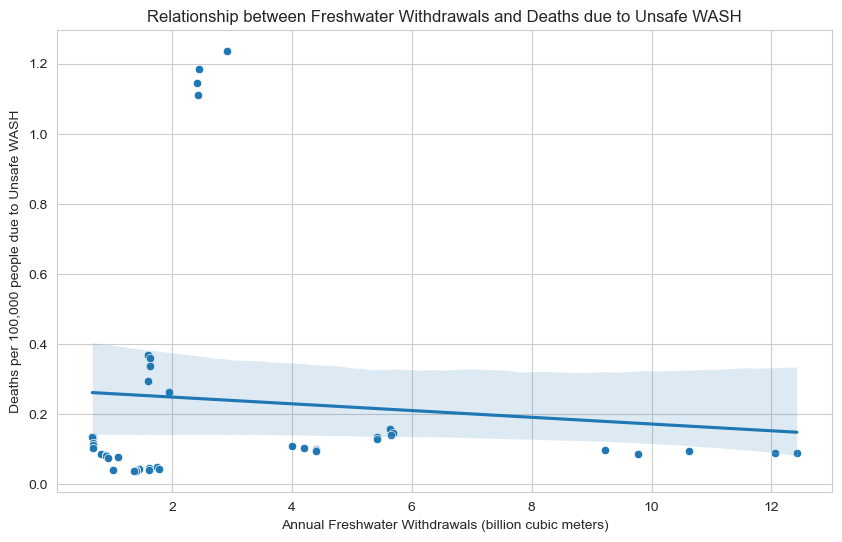

In [ ]:
# Rename columns for easier readability and to follow Python naming conventions
data.rename(columns={
    'Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized': 'Deaths_per_100K',
    'Annual freshwater withdrawals, total (billion cubic meters)': 'Freshwater_Withdrawals'
}, inplace=True)

# Convert freshwater withdrawals from cubic meters to billion cubic meters for easier interpretation
data['Freshwater_Withdrawals'] = data['Freshwater_Withdrawals'] / 1e9

# Initialize a figure for plotting with specified dimensions
plt.figure(figsize=(10, 6))
# Create a scatter plot showing the relationship between freshwater withdrawals and deaths due to unsafe WASH
scatter_plot = sns.scatterplot(x='Freshwater_Withdrawals', y='Deaths_per_100K', data=data)

# Overlay a regression line on the same plot to show the trend, without adding additional scatter points
sns.regplot(x='Freshwater_Withdrawals', y='Deaths_per_100K', data=data, scatter=False, ax=scatter_plot.axes)

# Set the title of the plot to describe its focus
plt.title('Relationship between Freshwater Withdrawals and Deaths due to Unsafe WASH')
# Label the x-axis to denote annual freshwater withdrawals in billion cubic meters
plt.xlabel('Annual Freshwater Withdrawals (billion cubic meters)')
# Label the y-axis to denote the death rate per 100,000 people due to unsafe WASH
plt.ylabel('Deaths per 100,000 people due to Unsafe WASH')

# Display the plot
plt.show()


/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


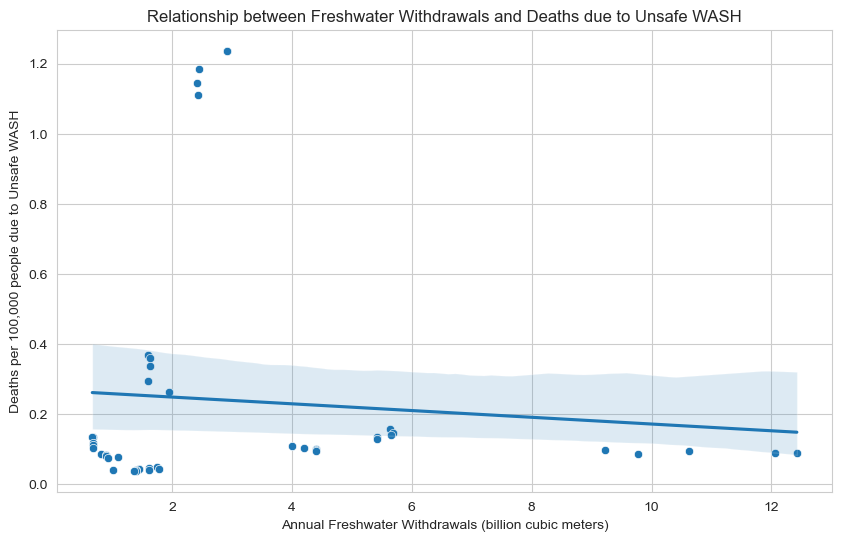

In [ ]:
# Initialize a plotting figure with specified dimensions
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the data points, mapping freshwater withdrawals to deaths due to unsafe WASH
scatter_plot = sns.scatterplot(x='Freshwater_Withdrawals', y='Deaths_per_100K', data=data)

# Overlay a regression line on the scatter plot to show the trend between the two variables, without adding scatter points from the regression
sns.regplot(x='Freshwater_Withdrawals', y='Deaths_per_100K', data=data, scatter=False, ax=scatter_plot.axes)

# Set the title to describe what the plot is showing
plt.title('Relationship between Freshwater Withdrawals and Deaths due to Unsafe WASH')

# Label the x-axis as annual freshwater withdrawals in billion cubic meters for clarity
plt.xlabel('Annual Freshwater Withdrawals (billion cubic meters)')

# Label the y-axis to indicate the measure of deaths per 100,000 people due to unsafe WASH
plt.ylabel('Deaths per 100,000 people due to Unsafe WASH')

# Display the plot
plt.show()


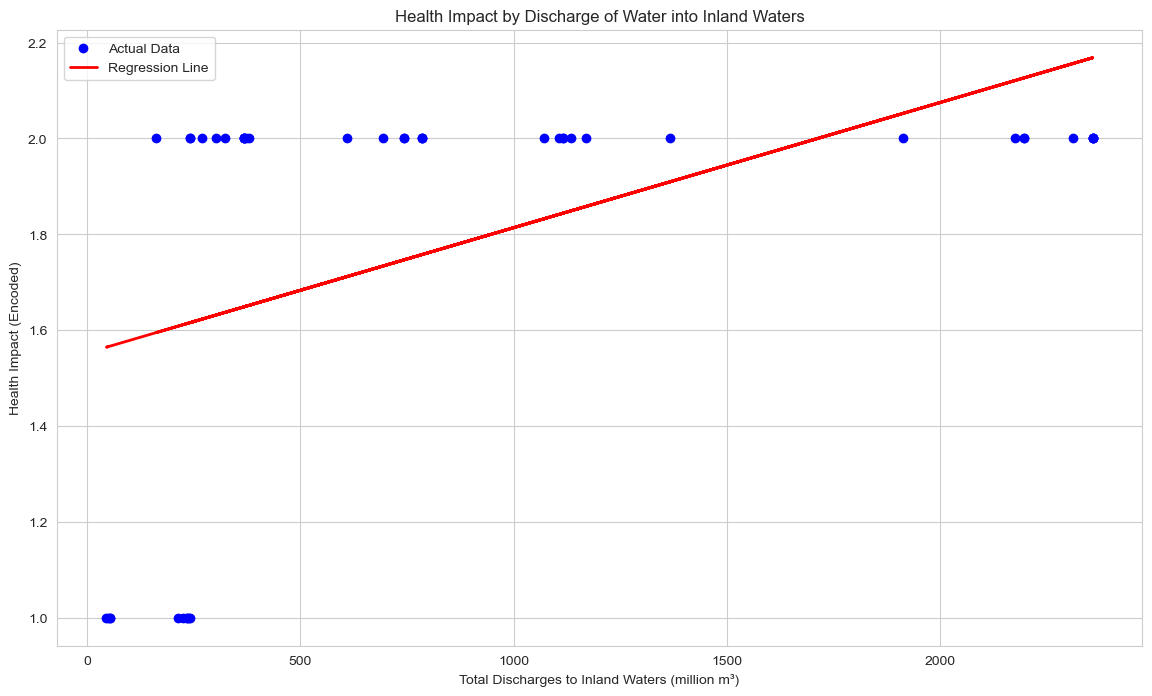

In [ ]:
# Map 'Low' and 'Medium' health impact categories to numerical values for regression analysis
health_impact_mapping = {'Low': 1, 'Medium': 2}
data['Health_Impact_Encoded'] = data['Health_Impact'].map(health_impact_mapping)

# Isolate the feature (X) and the target variable (y) for regression
X_inland = data[['Total discharges to Inland waters(million m3)']]
y_health_impact = data['Health_Impact_Encoded']

# Initialize the Linear Regression model
regressor_inland = LinearRegression()

# Fit the regression model using the inland water discharge data and the encoded health impact
regressor_inland.fit(X_inland, y_health_impact)

# Predict the health impact based on the model to visualize the regression line
y_health_impact_pred = regressor_inland.predict(X_inland)

# Initialize a figure for plotting
plt.figure(figsize=(14, 8))
# Plot actual data points as a scatter plot
plt.scatter(X_inland, y_health_impact, color='blue', label='Actual Data')
# Plot the regression line that models the relationship
plt.plot(X_inland, y_health_impact_pred, color='red', linewidth=2, label='Regression Line')
# Set the plot title
plt.title('Health Impact by Discharge of Water into Inland Waters')
# Label the x-axis
plt.xlabel('Total Discharges to Inland Waters (million m³)')
# Label the y-axis with the encoded health impact
plt.ylabel('Health Impact (Encoded)')
# Display the legend to differentiate actual data from the regression line
plt.legend()
# Show the plot
plt.show()
